# Spectra Dataset

In [2]:
from visualdl import vdl
import json
from openpyxl import load_workbook
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch

C:\Users\HSA\miniconda3\envs\hsa-web\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
train_x, train_y = [], []
valid_x, valid_y = [], []

In [ ]:
# Einzelsubstanzen
def get_csv_data(file_path):
    with open(file_path, encoding="utf-8") as handle:
        data = pd.read_csv(file_path, sep=";", skiprows=list(range(0, 89)), header=None)
    return data


csv_path = r"C:\Users\HSA\Desktop\Spektren\Einzelsubstanzen\csv Dateien"
for cnt, csv in enumerate(os.listdir(csv_path)):
    csv_file_path = os.path.join(csv_path, csv)
    csv_data = get_csv_data(csv_file_path)

    if ("Chromotrope") in csv:
        if csv.split(",")[0][-1] == "2":
            val = 12.0
        elif csv.split(",")[0][-1] == "0":
            val = 0.5
        elif csv.split(",")[0][-1] == "1":
            val = 1.5
        else:
            val = csv.split(",")[0][-1]
        val = float(val)
        x_data = [val, 0, 0]
    elif ("Chromtrope") in csv:
        if csv.split(",")[0][-1] == "2":
            val = 12.0
        elif csv.split(",")[0][-1] == "0":
            val = 0.5
        elif csv.split(",")[0][-1] == "1":
            val = 1.5
        else:
            val = csv.split(",")[0][-1]
        val = float(val)
        x_data = [val, 0, 0]
    elif "Erioglaucine" in csv:
        if csv.split(".")[0][-1] == "2":
            val = 12.0
        elif csv.split(".")[0][-1] == "0":
            val = 0.5
        elif csv.split(".")[0][-1] == "1":
            val = 1.5
        else:
            val = csv.split(".")[0][-1]
        val = float(val)
        x_data = [0, val, 0]
    elif "Riboflavin" in csv:
        if csv.split(",")[0][-1] == "2":
            val = 12.0
        elif csv.split(",")[0][-1] == "0":
            val = 0.5
        elif csv.split(",")[0][-1] == "1":
            val = 1.5
        else:
            val = csv.split(",")[0][-1]
        val = float(val)
        x_data = [0, 0, val]
    else:
        print(f"no valid substance: {csv}")
        continue

    all_values = list(
        map(
            lambda x: [
                float(x[i].replace(",", ".")) if type(x[i]) is str else x[i]
                for i in range(2)
            ],
            csv_data.values.tolist(),
        )
    )
    idx = list(np.round(np.linspace(0, len(all_values) - 1, 100)).astype(int))
    y_values = [all_values[i] for i in idx]
    y_values_flat = [item for sublist in y_values for item in sublist]

    if cnt % 6 == 0:
        valid_x.append(x_data)
        valid_y.append(y_values_flat)
    else:
        train_x.append(x_data)
        train_y.append(y_values_flat)

In [ ]:
x_values_b = []
for value in all_values:
    x_values_b.append(value[0])

In [ ]:
# Gemische
file_path = r"C:\Users\HSA\Desktop\Spektren\Gemische\Pulvermischungen Tabletten_neue Einwaage für M44.xlsx"
spectra_dir = r"C:\Users\HSA\Desktop\Spektren\Gemische\csv Dateien"
wb = load_workbook(filename=file_path, data_only=True)
sheet = wb["Zusammenfassung"]

spectra_files = os.listdir(spectra_dir)
for cnt, i in enumerate(range(3, 67)):
    file_name = sheet[f"A{i}"].value
    file_number = file_name[-2:]
    file_number = file_number if file_number[0] != "0" else file_number[1]
    samples = [x for x in spectra_files if ("Tablette " + file_number + "_") in x]

    for sample in samples:
        with open(file_path, encoding="utf-8") as handle:
            csv_data = pd.read_csv(
                os.path.join(spectra_dir, sample),
                sep=";",
                skiprows=list(range(0, 89)),
                header=None,
            )

        all_values = list(
            map(
                lambda x: [
                    float(x[i].replace(",", ".")) if type(x[i]) is str else x[i]
                    for i in range(2)
                ],
                csv_data.values.tolist(),
            )
        )
        # substitute g_factor x values with b x values
        all_values_b = [[x_values_b[i], x[1]] for i, x in enumerate(all_values)]
        idx = list(np.round(np.linspace(0, len(all_values) - 1, 100)).astype(int))
        y_values = [all_values_b[i] for i in idx]
        y_values_flat = [item for sublist in y_values for item in sublist]

        if cnt % 6 == 0:
            valid_x.append(
                [sheet[f"G{i}"].value, sheet[f"F{i}"].value, sheet[f"H{i}"].value]
            )
            valid_y.append(y_values_flat)
        else:
            train_x.append(
                [sheet[f"G{i}"].value, sheet[f"F{i}"].value, sheet[f"H{i}"].value]
            )
            train_y.append(y_values_flat)

In [ ]:
final_dict_train = {}
for cnt, (x, y) in enumerate(zip(train_x, train_y)):
    final_dict_train[cnt] = {"concentrations": x, "spectrum": y}

In [ ]:
with open("dataset_train.json", "w", encoding="utf-8") as handle:
    json.dump(final_dict_train, handle)

In [ ]:
with open("dataset_train.json", "r") as f:
    data_train = json.load(f)

In [ ]:
final_dict_valid = {}
for cnt, (x, y) in enumerate(zip(valid_x, valid_y)):
    final_dict_valid[cnt] = {"concentrations": x, "spectrum": y}

In [ ]:
with open("dataset_valid.json", "w", encoding="utf-8") as handle:
    json.dump(final_dict_valid, handle)

In [ ]:
with open("dataset_valid.json", "r") as f:
    data_valid = json.load(f)

In [ ]:
len(data_train.keys())

In [ ]:
len(data_valid.keys())

## Test Model

In [3]:
model = vdl.get_inference_model(r"C:\Users\HSA\Desktop\Spektren\model.pt", "mlp")

In [4]:
predictions = model.predict([[1.05, 2.05, 0.54]], mlp_output_pairwise=True)

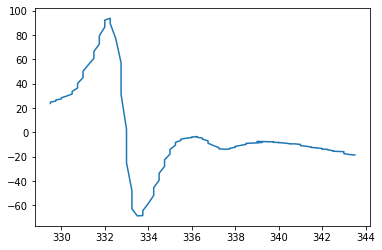

In [5]:
x_values = []
y_values = []
for pred in predictions[0]:
    x_values.append(pred[0])
    y_values.append(pred[1])

plt.plot(x_values, y_values)
plt.savefig("test_pred.png")

## Change Model Dict

In [ ]:
model = torch.load(r"C:\Users\HSA\Desktop\Spektren\model_100.pt")

In [ ]:
model.keys()

In [ ]:
model["custom_data"]["substances"]

In [ ]:
torch.save(model, r"C:\Users\HSA\Desktop\Spektren\model_100.pt")